In [1]:
import pyscreenshot as ImageGrab
import time


In [2]:
images_folder="captured_images/0/"
  
for i in range(0,5):
   time.sleep(5)
   im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
   print("saved......",i)
   im.save(images_folder+str(i)+'.png')
   print("clear screen now and redraw now........")


saved...... 0
clear screen now and redraw now........
saved...... 1
clear screen now and redraw now........
saved...... 2
clear screen now and redraw now........
saved...... 3
clear screen now and redraw now........
saved...... 4
clear screen now and redraw now........


Generate dataset


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
#pip install pandas


In [5]:
#pip install scikit-learn

In [6]:
import cv2
import csv
import glob

In [7]:
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)
        


# Load the dataset


In [8]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
103      1       1       1       0       0       0       0       0       0   
254      3       1       1       1       0       0       1       1       1   
764      8       1       1       1       1       0       0       0       1   
185      2       1       1       1       0       0       1       1       1   
60       0       1       1       1       1       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
143      1       1       1       0       0       0       0       1       1   
865      9       1       1       1       1       0       1       1       0   
88       1       1       1       0       0       0       1       0       0   
280      3       1       1       1       0       0       1       1       0   
98       1       1       1       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

# seperation of dependent and independent variable

In [9]:
X = data.drop(["label"],axis=1)
Y= data["label"]

# Preview of one image using matplotlib

2


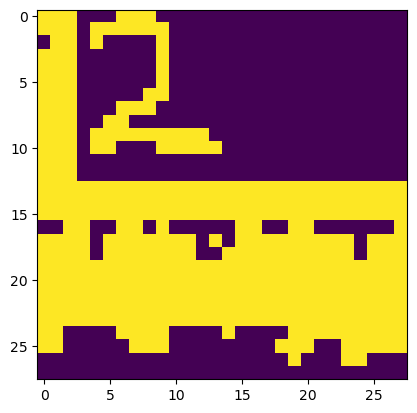

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 170
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# Train-Test split

In [11]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

# Fit the model using svc and also save the model using joblib